<a href="https://colab.research.google.com/github/Rakshithbodakuntla/GAN_using_PyTorch/blob/main/GAN_implementation_10epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9
Training complete!


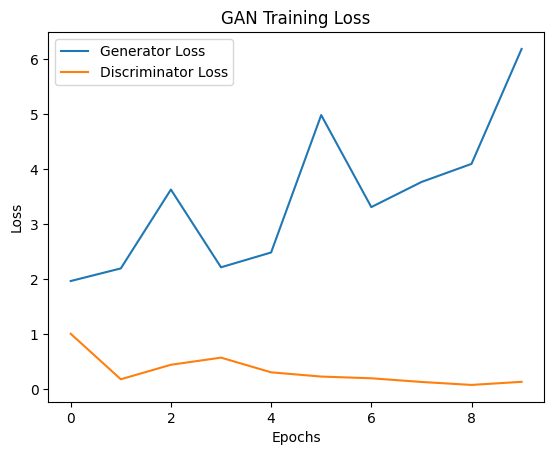

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Generator architecture
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x).view(-1, 1, 28, 28)

# Discriminator architecture
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x.view(-1, 784))

#Prepare the Training Data
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
lr = 0.0002
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

epochs = 10

# Initialize lists to store losses
loss_g_list = []
loss_d_list = []

for epoch in range(epochs):
    print(f"epoch :",epoch)
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Generate fake images
        noise = torch.randn(batch_size, 100).to(device)
        fake_imgs = generator(noise)

        # Train discriminator
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        loss_d_real = criterion(discriminator(real_imgs), real_labels)
        loss_d_fake = criterion(discriminator(fake_imgs.detach()), fake_labels)
        loss_d = (loss_d_real + loss_d_fake) / 2

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Train generator
        loss_g = criterion(discriminator(fake_imgs), real_labels)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    # Append losses after each epoch
    loss_g_list.append(loss_g.item())
    loss_d_list.append(loss_d.item())

    if epoch == 0 or epoch == 5 or epoch == 10:
        with torch.no_grad():
            noise = torch.randn(16, 100).to(device)
            sample_imgs = generator(noise).cpu()
            torchvision.utils.save_image(sample_imgs, f"generated_epoch_{epoch}.png", normalize=True)

print("Training complete!")

#. Visualizing Results

import matplotlib.pyplot as plt

plt.plot(loss_g_list, label="Generator Loss")
plt.plot(loss_d_list, label="Discriminator Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Training Loss")
plt.show()